In [23]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Reading data
path = "/home/shruti/taedata.csv"  # Use the variable 'path' instead of a string literal for the file path
df = pd.read_csv(path, header=None)  # Use 'path' variable for the file path
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [24]:
#adding features name to the data
data=pd.DataFrame(df.values, columns = ["englishSpeaker", "CourseInstructor", "Course", "Semester","Classsize","grade"])
data.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [25]:
data.isnull().sum()

englishSpeaker      0
CourseInstructor    0
Course              0
Semester            0
Classsize           0
grade               0
dtype: int64

In [26]:
#Classsize is the numerical feature so we are finding summary stattistics for this feature
data.Classsize.describe()

count    151.000000
mean      27.867550
std       12.893758
min        3.000000
25%       19.000000
50%       27.000000
75%       37.000000
max       66.000000
Name: Classsize, dtype: float64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   englishSpeaker    151 non-null    int64
 1   CourseInstructor  151 non-null    int64
 2   Course            151 non-null    int64
 3   Semester          151 non-null    int64
 4   Classsize         151 non-null    int64
 5   grade             151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


-10.813725641056461
66.5488249788048
27.867549668874172


,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


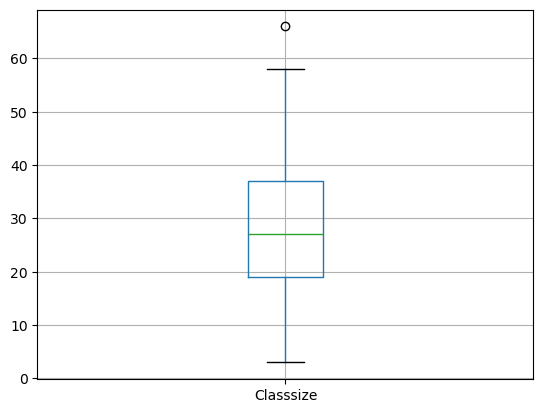

In [30]:
figure=data.boxplot(column="Classsize")
uppper_boundary=data['Classsize'].mean() + 3* data['Classsize'].std()
lower_boundary=data['Classsize'].mean() - 3* data['Classsize'].std()
print(lower_boundary), print(uppper_boundary),print(data['Classsize'].mean())
data.loc[data['Classsize']>=66,'Classsize']=60
data.head()

In [33]:
summerSemesterdata=data[data['Semester']==1]
summerSemesterdata.head()

,englishSpeaker,CourseInstructor,Course,Semester,Classsize,grade
0,1,23,3,1,19,3
1,2,15,3,1,17,3
5,2,23,3,1,20,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


/tmp/ipykernel_219520/2704898485.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Classsize'])
/home/shruti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


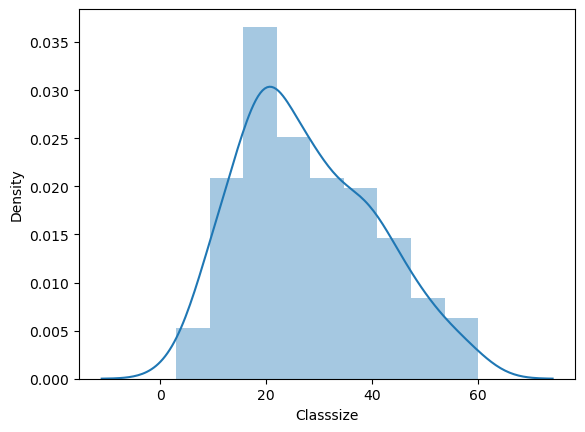

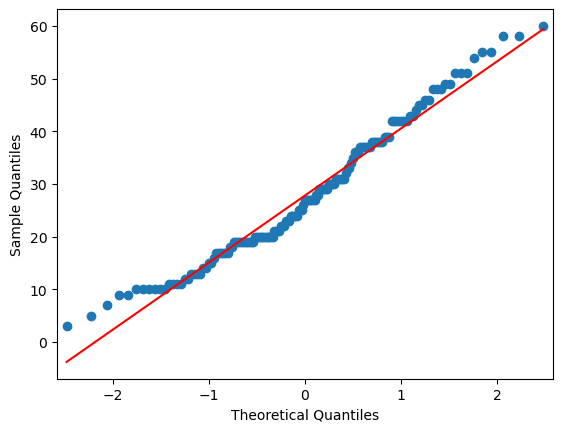

Accuracy_score: 0.875
=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.60      0.75         5
           3       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.89      0.87      0.85        16
weighted avg       0.92      0.88      0.87        16

[[7 0 0]
 [0 3 2]
 [0 0 4]]
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/shruti/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/shruti/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/shruti/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

Accuracy_score: 0.8125
[[6 1 0]
 [0 3 2]
 [0 0 4]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.75      0.60      0.67         5
           3       0.67      1.00      0.80         4

    accuracy                           0.81        16
   macro avg       0.81      0.82      0.80        16
weighted avg       0.84      0.81      0.81        16

H0: The features CourseInstructor and Course are independent


In [41]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import chi2_contingency, chi2


# Reading data
path = "/home/shruti/taedata.csv" 
data = pd.DataFrame(df.values, columns=["englishSpeaker", "CourseInstructor", "Course", "Semester", "Classsize", "grade"])

# Checking for missing values
data.isnull().sum()

# EDA
sns.distplot(data['Classsize'])
import statsmodels.api as sm
import pylab as py
sm.qqplot(data.Classsize, line='s')
py.show()

# Outlier removal using 3-sigma technique
upper_boundary = data['Classsize'].mean() + 3 * data['Classsize'].std()
lower_boundary = data['Classsize'].mean() - 3 * data['Classsize'].std()
data.loc[data['Classsize'] >= 66, 'Classsize'] = 60

# One-hot encoding for Course and CourseInstructor
data2 = pd.get_dummies(data['Course'], prefix='Course', drop_first=True)
data3 = pd.get_dummies(data['CourseInstructor'], prefix='CourseInstructor', drop_first=True)

# Binary encoding for englishSpeaker and Semester
data4 = pd.DataFrame(data['englishSpeaker'])
data4['englishSpeaker1'] = data4['englishSpeaker'].apply(lambda x: 0 if x == 1 else 1)

data5 = pd.DataFrame(data['Semester'])
data5['Semester1'] = data5['Semester'].apply(lambda x: 0 if x == 1 else 1)

# Combining all features
data8 = pd.concat([data2, data3], axis=1)
data7 = pd.concat([data4[['englishSpeaker1']], data5[['Semester1']]], axis=1)
data10 = pd.concat([data8, data7], axis=1)

# Scaling the Classsize feature
data9 = pd.DataFrame(data['Classsize'])
sc = MinMaxScaler()
classsize = sc.fit_transform(data9)
data11 = pd.DataFrame(classsize, columns=['classsize'])

# Final dataset preparation
X = pd.concat([data11, data10], axis=1)
y = data['grade']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model evaluation
print("Accuracy_score:", accuracy_score(y_test, y_pred))
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Hyperparameter optimization with RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['entropy', 'gini']}

rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                                 random_state=100, n_jobs=-1)
rf_randomcv.fit(X_train, y_train)
best_random_grid = rf_randomcv.best_estimator_

# Final model evaluation
y_pred = best_random_grid.predict(X_test)
print("Accuracy_score:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Hypothesis testing (Chi-squared test)
data_courseInstructor = pd.crosstab(data['Course'], data['CourseInstructor'], margins=False)
stat, p, dof, expected = chi2_contingency(data_courseInstructor)
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('H0: The features CourseInstructor and Course are independent')
else:
    print('H1: CourseInstructor and Course are associated')
